In [3]:
!pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 86.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [4]:
# Import the libraries we need
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import numpy as np

#read in the training data
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')
housing.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1565930130,20141104T000000,4,3.25,3760,4675,2.0,0,0,3,...,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0
1,3279000420,20150115T000000,3,1.75,1460,7800,1.0,0,0,2,...,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0
2,194000575,20141014T000000,4,1.00,1340,5800,1.5,0,2,3,...,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0
3,2115510160,20141208T000000,3,1.75,1440,8050,1.0,0,0,3,...,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0
4,7522500005,20140815T000000,2,1.50,1780,4750,1.0,0,0,4,...,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0


In [6]:
# Get our target variable and features and split them into test and train datasets
X = housing[['bedrooms',
         'bathrooms',
         'sqft_living',
         'sqft_lot',
         'floors',
         'waterfront',
         'view',
         'condition',
         'grade',
         'sqft_above',
         'sqft_basement',
         'yr_built',
         'yr_renovated',
         'zipcode',
         'sqft_living15',
         'sqft_lot15'
         ]]

y = housing['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Importances:
grade: 0.3684
sqft_living: 0.1806
waterfront: 0.1562
view: 0.0565
zipcode: 0.0460
yr_built: 0.0440
bathrooms: 0.0373
sqft_living15: 0.0262
condition: 0.0162
yr_renovated: 0.0144
sqft_lot: 0.0124
sqft_lot15: 0.0110
floors: 0.0095
sqft_above: 0.0080
sqft_basement: 0.0075
bedrooms: 0.0055


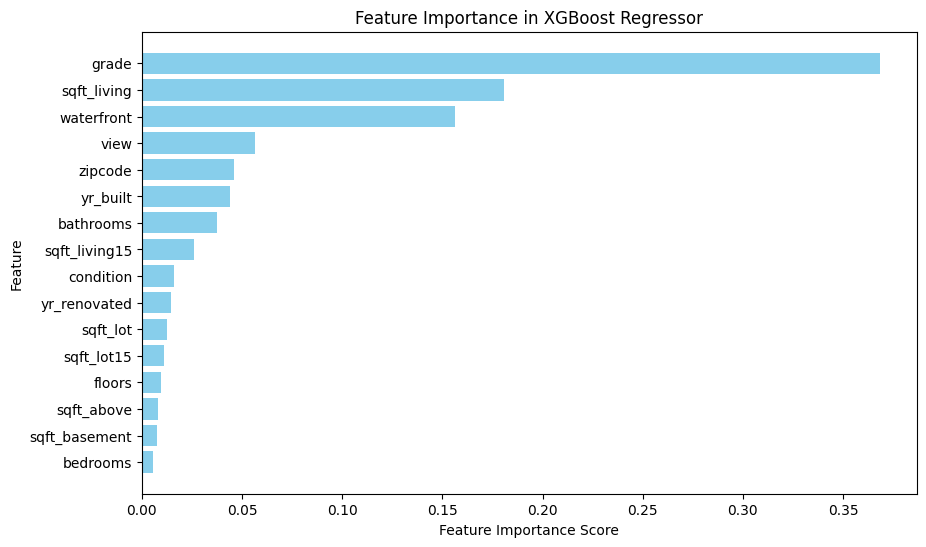

In [7]:
# Train an XGBoost regressor
model = XGBRegressor()
model.fit(X_train, y_train)

# Get feature importance scores
importance = model.feature_importances_
feature_names = X_train.columns  # Get feature names

# Sort indices by importance (descending)
sorted_idx = np.argsort(importance)[::-1]

# Print feature importance values with names
print("Feature Importances:")
for idx in sorted_idx:
    print(f"{feature_names[idx]}: {importance[idx]:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importance[sorted_idx], color='skyblue')  # Use feature names instead of index
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in XGBoost Regressor")
plt.gca().invert_yaxis()  # Most important feature at the top
plt.show()

In [36]:
X = housing[['grade',
         'sqft_living',
         'waterfront',  # research waterfront in seattle
         'view',
         'zipcode',
         #'sqft_living15',
         'sqft_lot15'
         ]]

y = housing['price']

#heatmaps

#Create the training and testing dataset on a 20/80 test.train split on the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model and train it, use default hyperparameters for now
model = XGBRegressor()
model.fit(X_train, y_train)

# Get predictions for our test data
price = model.predict(X_test)
price

#X_test["price"] = price

#price = X_test['price']

KeyError: 'price'

In [38]:
mini_holdout = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test_mini.csv')

mini_holdout.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,930000305,20141110T000000,4,1.75,2120,7680,1.0,0,0,4,7,1060,1060,1950,0,98177,47.7172,-122.361,1530,7680
1,9541600015,20150211T000000,4,2.25,2010,15375,1.0,0,0,4,8,2010,0,1957,0,98005,47.5956,-122.174,1930,15375
2,7338000150,20150129T000000,2,1.00,1070,4200,1.0,0,0,4,6,1070,0,1983,0,98002,47.3336,-122.215,1150,4200
3,6113400046,20140723T000000,4,2.50,1890,15770,2.0,0,0,4,7,1890,0,1968,0,98166,47.4281,-122.343,2410,15256
4,291310170,20140804T000000,3,2.50,1600,2610,2.0,0,0,3,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288


In [39]:
#MINI HOLD OUT
mini_holdout = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test.csv')

price = model.predict(mini_holdout)
price


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:date: object

In [33]:
#download predictions into a csv
# Write the dataframe to a csv, then download it
from google.colab import files
predictions = pd.DataFrame(price)

price.to_csv('price.csv', index = False)
files.download("price.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
#R-SQUARED METRIC VALUE
#RMSLE VALUE
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, predictions)
r_squared

0.8333289792723318

In [17]:
mini_holdout = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test_mini.csv')

In [ ]:
predic

In [23]:
# Compute the Root Mean Squared Error of the predictions
from sklearn.metrics import mean_squared_error

result = mean_squared_error(y_test, predictions, squared=False)
result

# Looks like we're off by just 4.5 mpg on average
# Not bad for a quick run with no real preprocessing

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


159411.28494564872